In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

In [98]:
btc = pd.read_csv('https://raw.githubusercontent.com/chrishyland/Crypto-position/master/bitcoin_final.csv')
crix = pd.read_csv('https://raw.githubusercontent.com/chrishyland/Crypto-position/master/crix.csv')
def reverse_date(btc, remove_date="Yes"):
    '''Reverses the dataset so it is in chronological order. Optional to remove date column and set as index.'''
    final_data = btc.reindex(index=btc.index[::-1])
    if remove_date == "Yes":
        # Need to reverse order of dataframe.
        final_data = final_data.set_index(btc['Date'])
        del final_data['Date']
    return final_data
dt = reverse_date(btc)

dt.head()


,Open,High,Low,Close,Volume,MarketCap
Date,,,,,,
22/11/2017,135.30,135.98,132.10,134.21,0,1500520000
21/11/2017,134.44,147.49,134.00,144.54,0,1491160000
20/11/2017,144.00,146.93,134.05,139.00,0,1597780000
19/11/2017,139.00,139.89,107.72,116.99,0,1542820000
18/11/2017,116.38,125.60,92.28,105.21,0,1292190000


We need to figure out how to configure plotly rangeslider to toggle window size, as I am an idiot and have no idea how to.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning:

pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=999,center=False).max()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning:

pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=999,center=False).min()



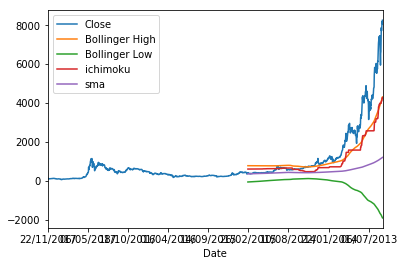

In [131]:
# How far back do we go? set window size.
window = 999

# This computes the Ichimoku Kinkō Hyō measure, which is a trend identification system

data = dt
high_prices = data['High']
close_prices = data['Close']
low_prices = data['Low']
dates = dt.index
n_period_high = pd.rolling_max(data['High'], window= window )
n_period_low = pd.rolling_min(data['Low'], window= window )
ichimoku = (n_period_high + n_period_low) /2
dt['ichimoku'] = ichimoku

# Bollinger bands! if you like, change the number of standard deviations.

no_of_std = 2
 
# Simple moving average (rolling mean)
rolling_mean = dt['Close'].rolling(window).mean()
rolling_std = dt['Close'].rolling(window).std()
 
rolling = dt['Close'].rolling(window=window)
dt['sma'] = rolling.mean()

    
# Graph it all
dt['Rolling Mean'] = rolling_mean
dt['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
dt['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
dt[['Close','Bollinger High','Bollinger Low', 'ichimoku','sma']].plot()
plt.show()

In [151]:
import numpy as np
import plotly
plotly.tools.set_credentials_file(username='alexoh', api_key='INSERTAPIKEYHERE')
import plotly.plotly as py
N = 500
random_x = np.linspace(0, 1, N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Ohlc(
    open = dt['Open'],
    high = dt['High'],
    low = dt['Low'],
    close = dt['Close']
)
boll = go.
data = [trace]

py.iplot(data, filename='basic-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alexoh/0 or inside your plot.ly account where it is named 'basic-line'
